Just wanna see how much I've been working during covid...

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Timesheet - 2020.csv')

df['date'] = pd.to_datetime(df['date'] + '/20')
df = df.dropna(subset=['date'])


df.head()

,weeknumber,weekday,date,start,end,duration,category,project,location,city
0,2,1,2020-01-05,3:20 PM,5:30 PM,2:10,biobot,NaN,plane,plane
1,2,2,2020-01-06,9:45 AM,11:40 AM,1:55,biobot,NaN,home,boston
2,2,2,2020-01-06,12:10 PM,5:00 PM,4:50,biobot,NaN,home,boston
3,2,3,2020-01-07,9:45 AM,10:35 AM,0:50,biobot,NaN,home,boston
4,2,3,2020-01-07,11:20 AM,11:50 AM,0:30,biobot,NaN,home,boston


In [3]:
df['minutes'] = df['duration'].apply(lambda s: int(s.split(':')[0])*60 + int(s.split(':')[1]))
df['hours'] = df['minutes'] / 60.0
df.head()

,weeknumber,weekday,date,start,end,duration,category,project,location,city,minutes,hours
0,2,1,2020-01-05,3:20 PM,5:30 PM,2:10,biobot,NaN,plane,plane,130,2.166667
1,2,2,2020-01-06,9:45 AM,11:40 AM,1:55,biobot,NaN,home,boston,115,1.916667
2,2,2,2020-01-06,12:10 PM,5:00 PM,4:50,biobot,NaN,home,boston,290,4.833333
3,2,3,2020-01-07,9:45 AM,10:35 AM,0:50,biobot,NaN,home,boston,50,0.833333
4,2,3,2020-01-07,11:20 AM,11:50 AM,0:30,biobot,NaN,home,boston,30,0.500000


In [73]:
# Label weekends
df['weekend'] = df['weekday'].apply(lambda x: True if x == "1" or x == "7" else False)

In [74]:
df[['weekday', 'weekend']].drop_duplicates()

,weekday,weekend
0,1,True
1,2,False
3,3,False
9,4,False
12,5,False
15,6,False
20,7,True


In [75]:
totalhours = df.groupby(['date', 'weekend']).sum().reset_index()
totalhours.head()

,date,weekend,weeknumber,minutes,hours,after_covid_campaign
0,2020-01-05,True,2,130,2.166667,0.0
1,2020-01-06,False,6,405,6.750000,0.0
2,2020-01-07,False,12,335,5.583333,0.0
3,2020-01-08,False,6,480,8.000000,0.0
4,2020-01-09,False,6,445,7.416667,0.0


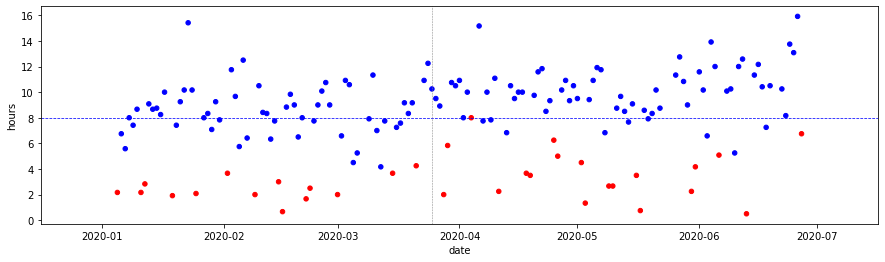

In [88]:
# Daily hours worked, colored by weekend or not
# Note: this doesn't show dates where I didn't work
fig, ax = plt.subplots(figsize=(15, 4))
totalhours.plot(
    x='date', y='hours', kind='scatter', ax=ax, 
    c=totalhours['weekend'].map({True: 'r', False: 'b'}))
# Horizontal line at 8 hours per day
ax.axhline(8, linestyle='--', c='blue', linewidth=0.75)
# Vertical lie at March 25th, start of covid campaign
ax.axvline(pd.to_datetime('2020-03-25'), linestyle='--', c='gray', linewidth=0.5)

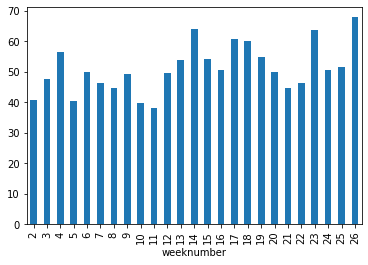

In [89]:
df['weeknumber'] = df['weeknumber'].astype(int)
df.groupby('weeknumber').sum()['hours'].plot(kind='bar')

In [90]:
# Convert week number to a datetime
# https://stackoverflow.com/a/45437018
df['weeknumber_date'] = (
    pd.to_datetime('2020', format='%Y') 
    + pd.to_timedelta(df['weeknumber'].mul(7).astype(str) + ' days')
)

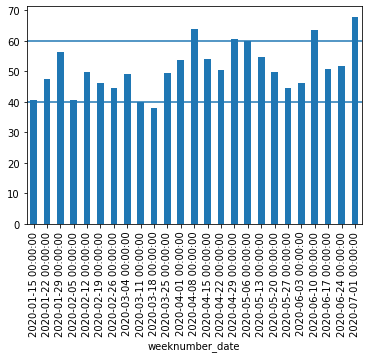

In [91]:
ax = df.groupby('weeknumber_date').sum()['hours'].plot(kind='bar')
ax.axhline(40)
ax.axhline(60)

In [92]:
# Average weekly hours before and after march 25th, which is week 12
df['after_covid_campaign'] = df['weeknumber'] >= 12

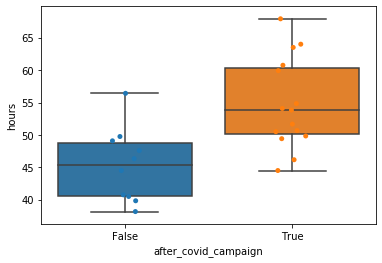

In [93]:
weekly_hours = df.groupby(['after_covid_campaign', 'weeknumber_date']).sum()['hours'].reset_index()

sns.boxplot(data=weekly_hours, y='hours', x='after_covid_campaign')
sns.stripplot(data=weekly_hours, y='hours', x='after_covid_campaign')

In [94]:
before_covid_mean = weekly_hours.groupby('after_covid_campaign').mean().loc[False].values[0]
after_covid_mean = weekly_hours.groupby('after_covid_campaign').mean().loc[True].values[0]

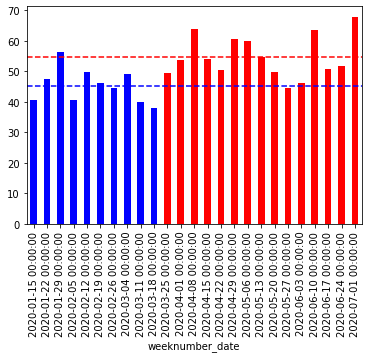

In [95]:
ax = weekly_hours.plot(
    kind='bar', x='weeknumber_date', y='hours', 
    color=weekly_hours['after_covid_campaign'].map({True: 'red', False: 'blue'}),
    legend=False
)

ax.axhline(before_covid_mean, c='blue', linestyle='--')
ax.axhline(after_covid_mean, c='red', linestyle='--')